In [1]:
from apps.twodimensional.shallowwatermomentequations import shallow_water_moment_equations as swme
from apps.twodimensional.shallowwaterlinearizedmomentequations import shallow_water_linearized_moment_equations as swlme
from apps.twodimensional.shallowwaterlinearizedmomentequations.manufacturedsolutionexample import manufactured_solution_example as swlme_mse
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.timestepping import explicit_runge_kutta
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.utils import xt_functions
from pydogpack.visualize import plot

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

from IPython.display import HTML

# Manufactured Solution

## Cartesian Mesh

In [2]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.1
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 4
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

num_rows = 80
num_cols = 80
x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.3
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
face_area = max(delta_x, delta_y)
elem_vol = delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [58]:
final_solution = main.run(problem)

10.0%
Will finish in 0:01:02.257860 at 15:02:44.738633
20.0%
Will finish in 0:00:50.785732 at 15:02:39.045398
30.0%
Will finish in 0:00:43.037423 at 15:02:37.045266
40.0%
Will finish in 0:00:36.242611 at 15:02:35.967585
50.0%
Will finish in 0:00:29.879961 at 15:02:35.323155
60.0%
Will finish in 0:00:23.737767 at 15:02:34.907651
70.0%
Will finish in 0:00:17.691446 at 15:02:34.534720
80.0%
Will finish in 0:00:11.732990 at 15:02:34.228184
90.0%
Will finish in 0:00:05.847821 at 15:02:34.041443
100.0%
Will finish in 0:00:00 at 15:02:33.885257


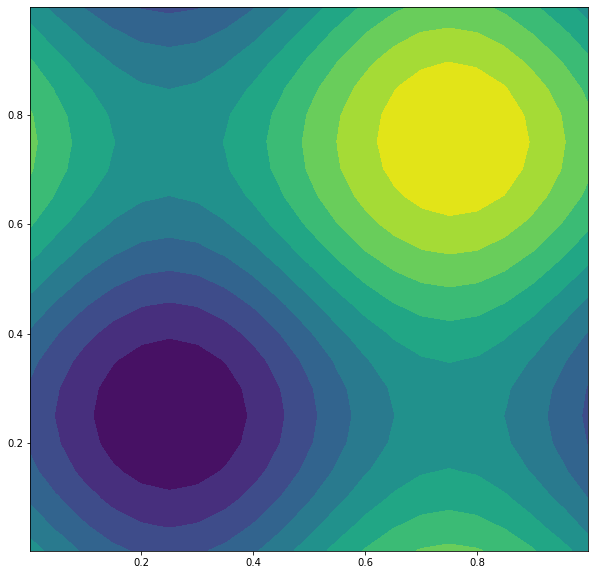

In [64]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, eqn=4);
HTML(ani.to_html5_video())

In [3]:
dg_solution = problem.basis_.project(problem.initial_condition, problem.mesh_)

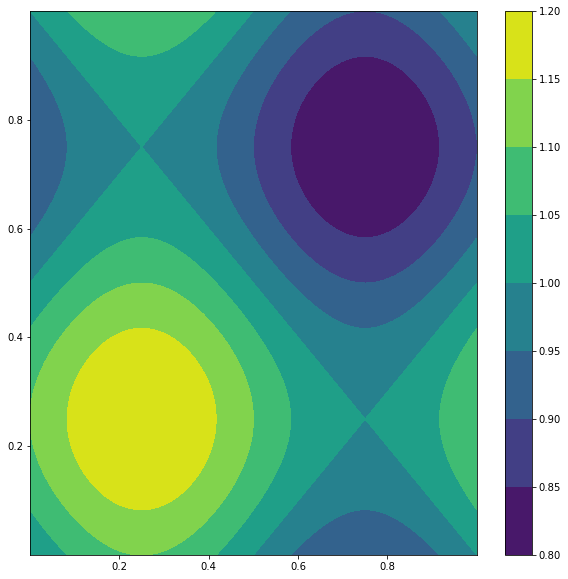

In [5]:
fig = dg_solution.create_plot(0)

In [6]:
fig.savefig("h_mms.pdf")

In [53]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.1691492226414476

In [56]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.08990971912666855

In [59]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.08379919031891384

### Convergence Test

In [2]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

wavespeed = np.array([2.0, 1.0])
problem = swlme_mse.ManufacturedSolutionExample(
    num_moments,
    wavespeed,
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.2
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10

x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 0.5, 2:0.1, 3:0.06, 4:0.06}

In [4]:
for space_time_order in range(3, 4):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    for n in [5, 10, 20, 40]:
        problem.output_dir = "output_" + str(n)
        problem.parameters["mesh"]["num_rows"] = n
        problem.parameters["mesh"]["num_cols"] = n
        delta_x = (x_right - x_left) / n
        delta_y = (y_top - y_bottom) / n
        face_area = max(delta_x, delta_y)
        elem_vol = delta_x * delta_y
        delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

10.0%
Will finish in 0:00:17.093475 at 11:15:27.685020
20.0%
Will finish in 0:00:15.256864 at 11:15:27.763350
30.0%
Will finish in 0:00:13.568914 at 11:15:28.076433
40.0%
Will finish in 0:00:11.796745 at 11:15:28.353512
50.0%
Will finish in 0:00:09.784250 at 11:15:28.260770
60.0%
Will finish in 0:00:07.848831 at 11:15:28.314347
70.0%
Will finish in 0:00:05.907976 at 11:15:28.385524
80.0%
Will finish in 0:00:03.934918 at 11:15:28.366859
90.0%
Will finish in 0:00:01.972386 at 11:15:28.416131
100.0%
Will finish in 0:00:00 at 11:15:28.470964
10.0%
Will finish in 0:01:57.478215 at 11:17:39.373258
20.0%
Will finish in 0:01:43.026716 at 11:17:37.625303
30.0%
Will finish in 0:01:29.647742 at 11:17:36.910111
40.0%
Will finish in 0:01:16.092883 at 11:17:35.663380
50.0%
Will finish in 0:01:02.970164 at 11:17:34.782236
60.0%
Will finish in 0:00:50.146936 at 11:17:34.209248
70.0%
Will finish in 0:00:37.664378 at 11:17:34.389834
80.0%
Will finish in 0:00:25.249088 at 11:17:35.087348
90.0%
Will finis

## Unstructured Mesh

In [17]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.1
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 1
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order

num_rows = 20
num_cols = 20
x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_triangulated_rectangle"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.7
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
face_area = max(delta_x, delta_y, hypotonuse)
elem_vol = 0.5 * delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [18]:
final_solution = main.run(problem)

10.0%
Will finish in 0:00:21.285351 at 14:30:14.715623
20.0%
Will finish in 0:00:18.535420 at 14:30:14.234508
30.0%
Will finish in 0:00:16.874223 at 14:30:15.171266
40.0%
Will finish in 0:00:14.941846 at 14:30:15.968310
50.0%
Will finish in 0:00:12.589788 at 14:30:16.244809
60.0%
Will finish in 0:00:09.956923 at 14:30:15.957540
70.0%
Will finish in 0:00:07.318510 at 14:30:15.460266
80.0%
Will finish in 0:00:04.885792 at 14:30:15.494195
90.0%
Will finish in 0:00:02.420377 at 14:30:15.269000
100.0%
Will finish in 0:00:00 at 14:30:15.102984


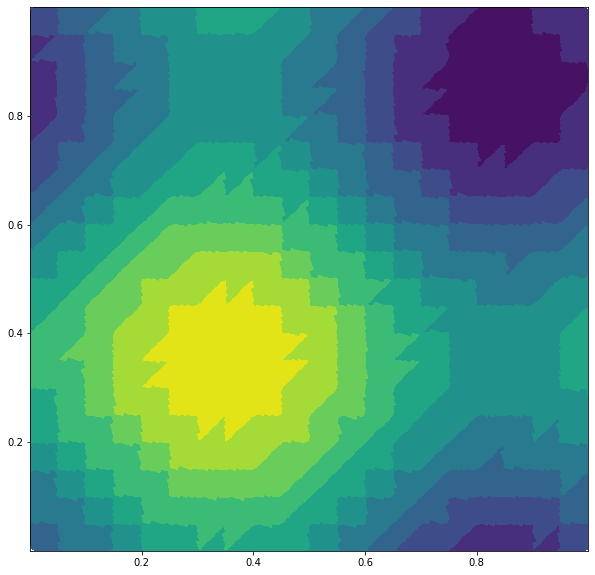

In [19]:
ani, fig = plot.create_animation_output_dir(problem.output_dir, eqn=0);
HTML(ani.to_html5_video())

### Convergence Test

In [11]:
num_moments = 0
gravity_constant = 1.0
kinematic_viscosity = 0.0
slip_length = 0.0

problem = swlme_mse.ManufacturedSolutionExample(
    num_moments, 
    gravity_constant, 
    kinematic_viscosity, 
    slip_length
)

time_final = 0.1
exact_final_solution = x_functions.FrozenT(problem.exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["is_verbose"] = True
problem.parameters["time_stepping"]["num_frames"] = 10

x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_triangulated_rectangle"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top

problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 0.5, 2:0.1, 3:0.06, 4:0.06}

In [13]:
for space_time_order in range(3, 4):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    for n in [5, 10, 20, 40]:
        problem.parameters["mesh"]["num_rows"] = n
        problem.parameters["mesh"]["num_cols"] = n
        problem.output_dir = "output_tri_" + str(n)
        delta_x = (x_right - x_left) / n
        delta_y = (y_top - y_bottom) / n
        hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
        face_area = max(delta_x, delta_y, hypotonuse)
        elem_vol = 0.5 * delta_x * delta_y
        delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

10.0%
Will finish in 0:00:43.174215 at 13:47:09.182256
20.0%
Will finish in 0:00:38.418716 at 13:47:09.234301
30.0%
Will finish in 0:00:33.616809 at 13:47:09.234919
40.0%
Will finish in 0:00:28.767291 at 13:47:09.156391
50.0%
Will finish in 0:00:23.964022 at 13:47:09.138950
60.0%
Will finish in 0:00:19.155867 at 13:47:09.100573
70.0%
Will finish in 0:00:14.361590 at 13:47:09.082873
80.0%
Will finish in 0:00:09.580417 at 13:47:09.112990
90.0%
Will finish in 0:00:04.790994 at 13:47:09.120847
100.0%
Will finish in 0:00:00 at 13:47:09.135198
10.0%
Will finish in 0:05:43.283922 at 13:53:31.069382
20.0%
Will finish in 0:05:04.178696 at 13:53:29.866172
30.0%
Will finish in 0:04:26.310422 at 13:53:30.086262
40.0%
Will finish in 0:03:48.135142 at 13:53:29.868039
50.0%
Will finish in 0:03:10.861877 at 13:53:31.366556
60.0%
Will finish in 0:02:32.671128 at 13:53:31.320622
70.0%
Will finish in 0:01:54.408624 at 13:53:31.004883
80.0%
Will finish in 0:01:16.304339 at 13:53:31.164497
90.0%
Will finis